<a href="https://colab.research.google.com/github/radhikark0707/exam/blob/main/ExitExam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem Statement:Predict a model that can identify which employees are at risk of leaving the company

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load Dataset

In [75]:
employee=pd.read_csv('/content/Employee.csv')

Understand the data and the structure

In [76]:
#Display first few rows of data to understand their structure
print('Employee Data:')
employee.head()

Employee Data:


,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2.0,...,0.0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3.0,...,3.0,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0.0,...,3.0,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1.0,...,2.0,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0.0,...,0.0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [77]:
#shape of Employee dataset
employee.shape

(74498, 24)

There are 74498 rows and 24 columns

In [78]:
#Datatype of each column in Employee Dataset
employee.dtypes

,0
Employee ID,int64
Age,int64
Gender,object
Years at Company,int64
Job Role,object
Monthly Income,int64
Work-Life Balance,object
Job Satisfaction,object
Performance Rating,object
Number of Promotions,float64


In [79]:
#Structure and Basic info of dataset
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74498 entries, 0 to 74497
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Employee ID               74498 non-null  int64  
 1   Age                       74498 non-null  int64  
 2   Gender                    74498 non-null  object 
 3   Years at Company          74498 non-null  int64  
 4   Job Role                  74498 non-null  object 
 5   Monthly Income            74498 non-null  int64  
 6   Work-Life Balance         74494 non-null  object 
 7   Job Satisfaction          74498 non-null  object 
 8   Performance Rating        74494 non-null  object 
 9   Number of Promotions      74493 non-null  float64
 10  Overtime                  74498 non-null  object 
 11  Distance from Home        74498 non-null  int64  
 12  Education Level           74493 non-null  object 
 13  Marital Status            74494 non-null  object 
 14  Number

There are missing value in Work-Life Balance,Performance Rating,Number of Promotions,Education Level ,Number fo Dependents,Joblevel,Company Size,Remote work,Employee Recognition

In [80]:
#Summary Statistics of Dataset
print('Summary Statistics of Employee Data:')
employee.describe()

Summary Statistics of Employee Data:


,Employee ID,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
count,74498.000000,74498.000000,74498.000000,74498.000000,74493.000000,74498.000000,74492.000000,74498.000000
mean,37249.500000,38.529746,15.721603,7299.379514,0.832978,49.991584,1.650365,55.727456
std,21505.864514,12.083456,11.223744,2152.508566,0.995303,28.513611,1.553660,25.399349
min,1.000000,18.000000,1.000000,1226.000000,0.000000,1.000000,0.000000,2.000000
25%,18625.250000,28.000000,7.000000,5652.000000,0.000000,25.000000,0.000000,36.000000
50%,37249.500000,39.000000,13.000000,7348.000000,1.000000,50.000000,1.000000,56.000000
75%,55873.750000,49.000000,23.000000,8876.000000,2.000000,75.000000,3.000000,76.000000
max,74498.000000,59.000000,51.000000,16149.000000,4.000000,99.000000,6.000000,128.000000


In [81]:
#columns of Employee dataset
employee.columns

Index(['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role',
       'Monthly Income', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level', 'Marital Status',
       'Number of Dependents', 'Job Level', 'Company Size', 'Company Tenure',
       'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities',
       'Company Reputation', 'Employee Recognition', 'Attrition'],
      dtype='object')

In [82]:
#checking frequency of each column

In [83]:
print('fREquency of Age')
employee['Age'].value_counts()

fREquency of Age


,count
Age,
34,1875
40,1861
53,1843
45,1842
38,1834
55,1824
43,1822
30,1818
39,1813


In [84]:
print('Frequency of Gender')
employee['Gender'].value_counts()

Frequency of Gender


,count
Gender,
Male,40826
Female,33672


In [85]:
print('Frequency of Years at Company')
employee['Years at Company'].value_counts()

Frequency of Years at Company


,count
Years at Company,
5,3084
1,3056
2,3039
8,3015
10,2987
9,2965
3,2961
6,2952
7,2933


In [86]:
print('Frequency of Job role')
employee['Job Role'].value_counts()

Frequency of Job role


,count
Job Role,
Technology,19322
Healthcare,17074
Education,15658
Media,11996
Finance,10448


In [87]:
print('Frequency of Monthly Income')
employee['Monthly Income'].value_counts()

Frequency of Monthly Income


,count
Monthly Income,
8397,27
6201,26
6074,25
6061,25
7976,25
...,...
13138,1
2887,1
2035,1


In [88]:
print('Frequency of Work-Life Balance')
employee['Work-Life Balance'].value_counts()

Frequency of Work-Life Balance


,count
Work-Life Balance,
Good,28157
Fair,22528
Excellent,13431
Poor,10378


In [89]:
print('Frequency of Job Satisfaction')
employee['Job Satisfaction'].value_counts()

Frequency of Job Satisfaction


,count
Job Satisfaction,
High,37245
Very High,15079
Medium,14717
Low,7457


In [90]:
print('Frequency of Performance Rating')
employee['Performance Rating'].value_counts()

Frequency of Performance Rating


,count
Performance Rating,
Average,44716
High,14910
Below Average,11139
Low,3729


In [91]:
print('Frequency of Number of Promotions')
employee['Number of Promotions'].value_counts()

Frequency of Number of Promotions


,count
Number of Promotions,
0.0,37141
1.0,18680
2.0,13634
3.0,4049
4.0,989


In [92]:
print('Frequency of Overtime')
employee['Overtime'].value_counts()

Frequency of Overtime


,count
Overtime,
No,50157
Yes,24341


In [93]:
print('Frequency of Distance from home')
employee['Distance from Home'].value_counts()

Frequency of Distance from home


,count
Distance from Home,
53,850
38,802
16,801
84,800
44,796
...,...
86,705
47,700
85,699


In [94]:
print('Frequency of Education Level')
employee['Education Level'].value_counts()

Frequency of Education Level


,count
Education Level,
Bachelor’s Degree,22331
Associate Degree,18648
Master’s Degree,15019
High School,14679
PhD,3816


In [95]:
print('Frequency of Martial status')
employee['Marital Status'].value_counts()

Frequency of Martial status


,count
Marital Status,
Married,37417
Single,25999
Divorced,11078


In [96]:
print('Frequency of Number of Dependents')
employee['Number of Dependents'].value_counts()

Frequency of Number of Dependents


,count
Number of Dependents,
0.0,22256
1.0,19329
2.0,11116
3.0,10374
4.0,7620
5.0,3006
6.0,791


In [97]:
print('Frequency of Job level')
employee['Job Level'].value_counts()

Frequency of Job level


,count
Job Level,
Entry,29778
Mid,29676
Senior,15039


In [98]:
print('Frequency of Company Size')
employee['Company Size'].value_counts()

Frequency of Company Size


,count
Company Size,
Medium,37230
Small,22354
Large,14912


In [99]:
print('Frequency of Company Tenure')
employee['Company Tenure'].value_counts()

Frequency of Company Tenure


,count
Company Tenure,
65,994
43,993
55,986
50,974
52,974
...,...
123,13
125,12
126,7


In [100]:
print('Frequency of Remote Work')
employee['Remote Work'].value_counts()

Frequency of Remote Work


,count
Remote Work,
No,60297
Yes,14198


In [101]:
print('Frequency of Leadership Opportunities')
employee['Leadership Opportunities'].value_counts()

Frequency of Leadership Opportunities


,count
Leadership Opportunities,
No,70845
Yes,3653


In [102]:
print('Frequency of Innovation Opportunities')
employee['Innovation Opportunities'].value_counts()

Frequency of Innovation Opportunities


,count
Innovation Opportunities,
No,62394
Yes,12104


In [103]:
print('Frequency of Company Reputation')
employee['Company Reputation'].value_counts()

Frequency of Company Reputation


,count
Company Reputation,
Good,37182
Poor,15116
Fair,14786
Excellent,7414


In [104]:
print('Frequency of Employee Recognition')
employee['Employee Recognition'].value_counts()

Frequency of Employee Recognition


,count
Employee Recognition,
Low,29619
Medium,22656
High,18550
Very High,3671


In [105]:
print('Frequency of Attrition')
employee['Attrition'].value_counts(normalize=True)*100

Frequency of Attrition


,proportion
Attrition,
Stayed,52.522215
Left,47.477785


In [106]:
#categorical Feature Distribution

In [107]:
employee.columns

Index(['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role',
       'Monthly Income', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level', 'Marital Status',
       'Number of Dependents', 'Job Level', 'Company Size', 'Company Tenure',
       'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities',
       'Company Reputation', 'Employee Recognition', 'Attrition'],
      dtype='object')

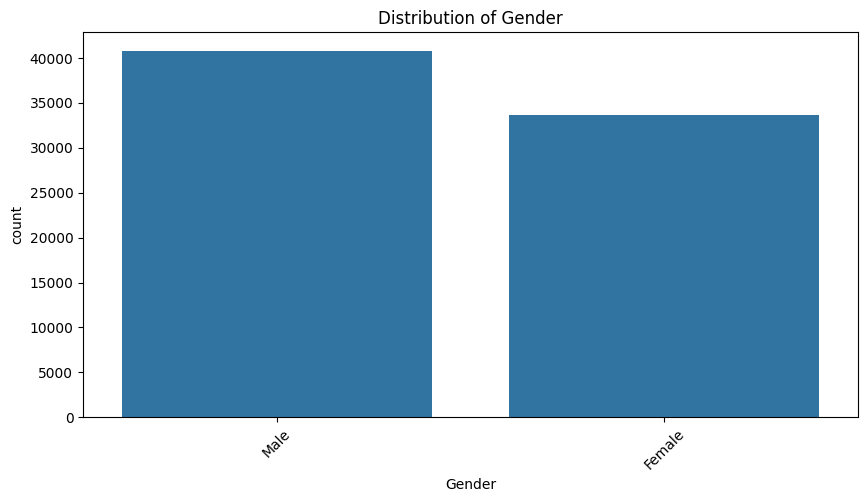

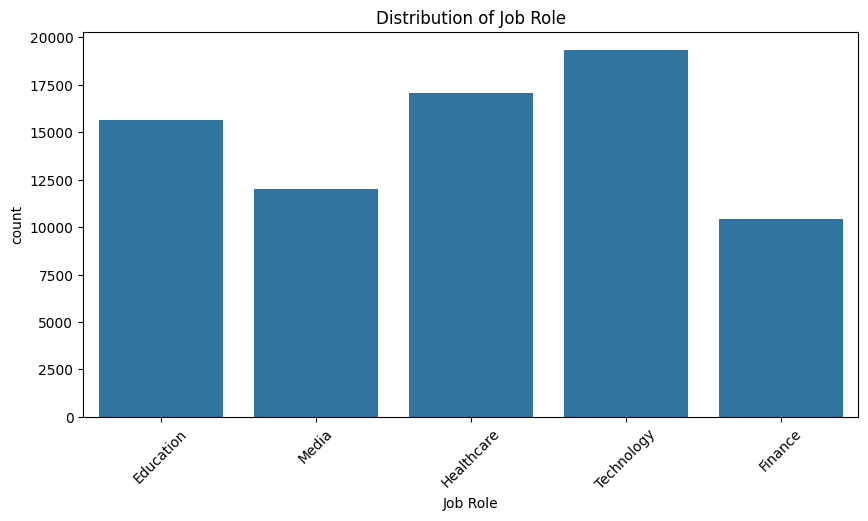

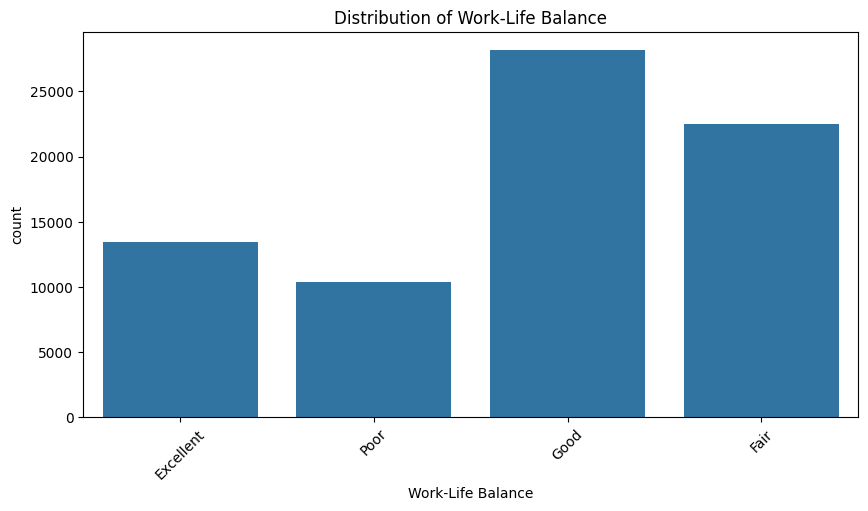

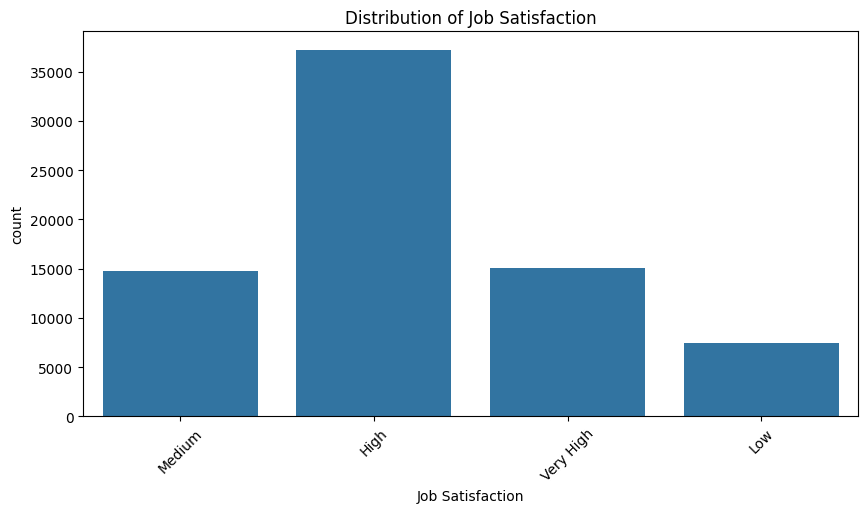

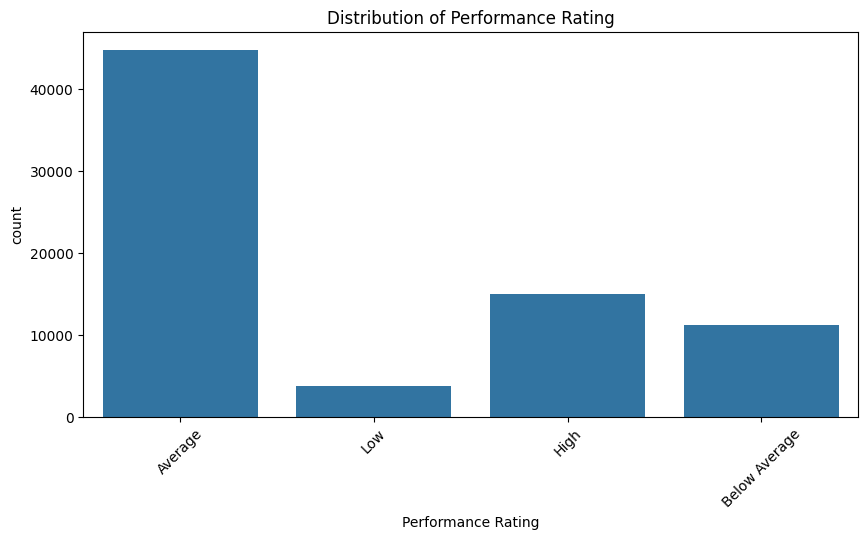

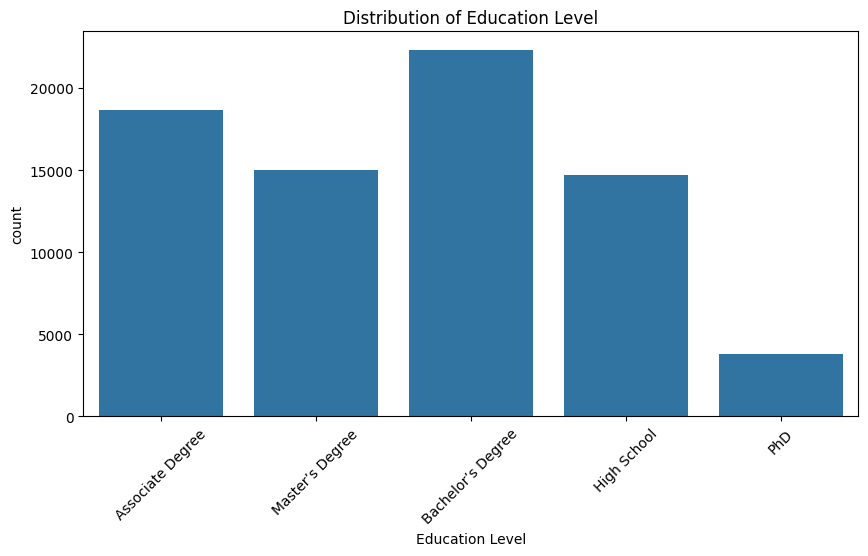

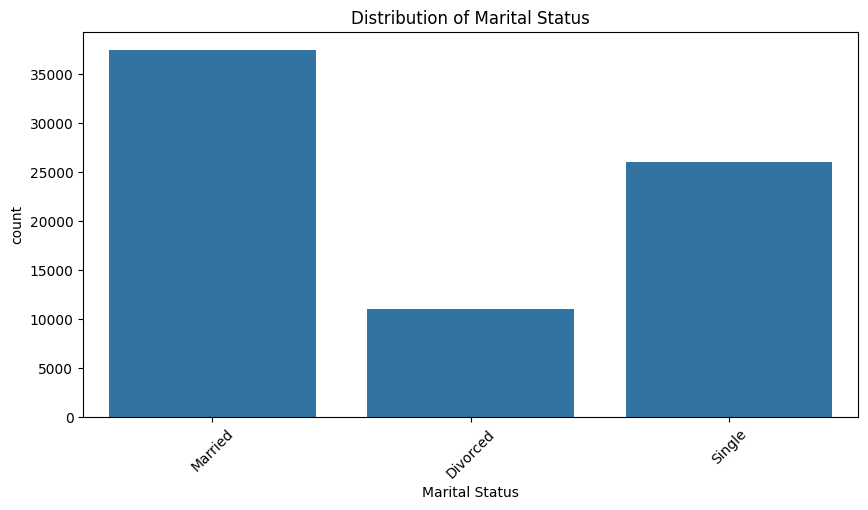

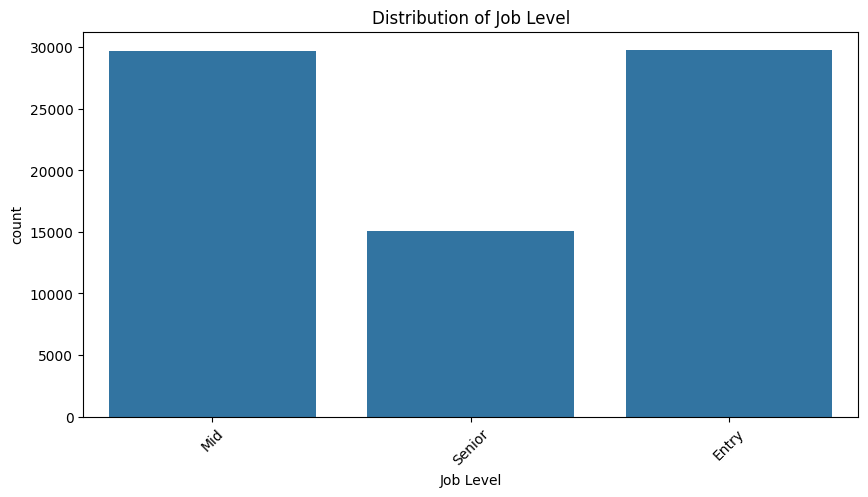

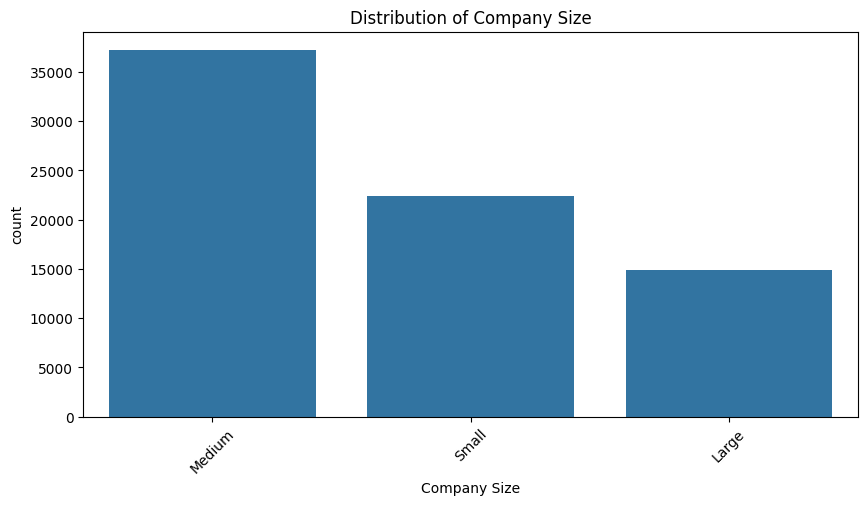

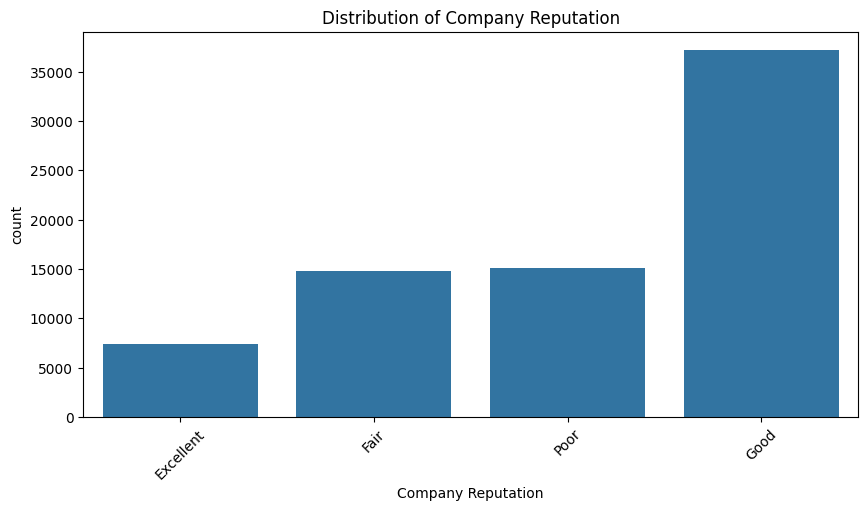

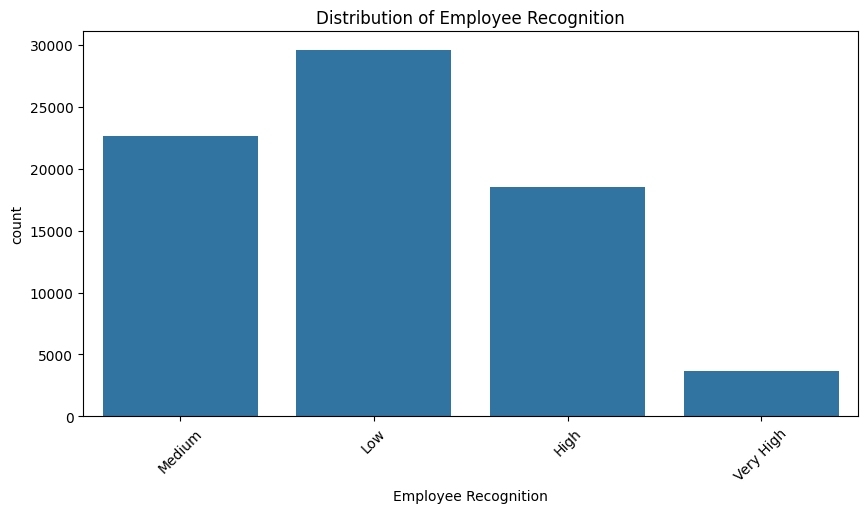

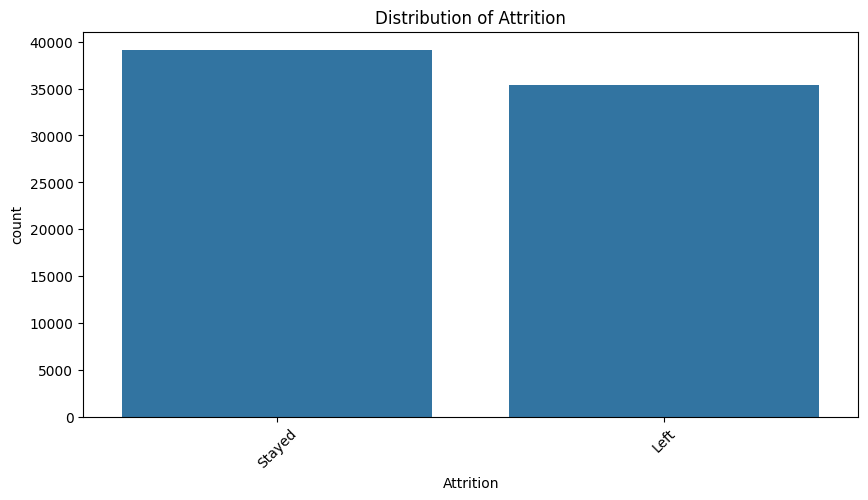

In [108]:
c=['Gender','Job Role','Work-Life Balance','Job Satisfaction','Performance Rating','Education Level','Marital Status','Job Level','Company Size','Company Reputation','Employee Recognition','Attrition']
for i in c:
  plt.figure(figsize=(10,5))
  sns.countplot(x=employee[i])
  plt.title(f'Distribution of {i}')
  plt.xticks(rotation=45)
  plt.show()

In [109]:
employee.columns

Index(['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role',
       'Monthly Income', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level', 'Marital Status',
       'Number of Dependents', 'Job Level', 'Company Size', 'Company Tenure',
       'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities',
       'Company Reputation', 'Employee Recognition', 'Attrition'],
      dtype='object')

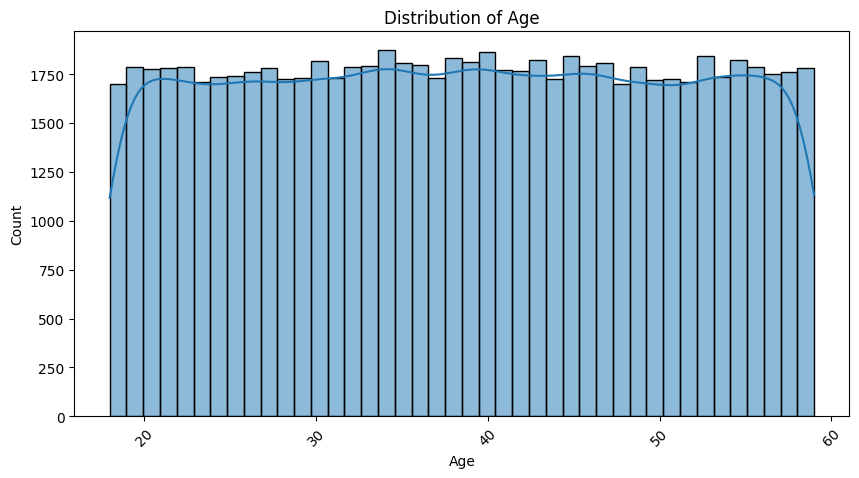

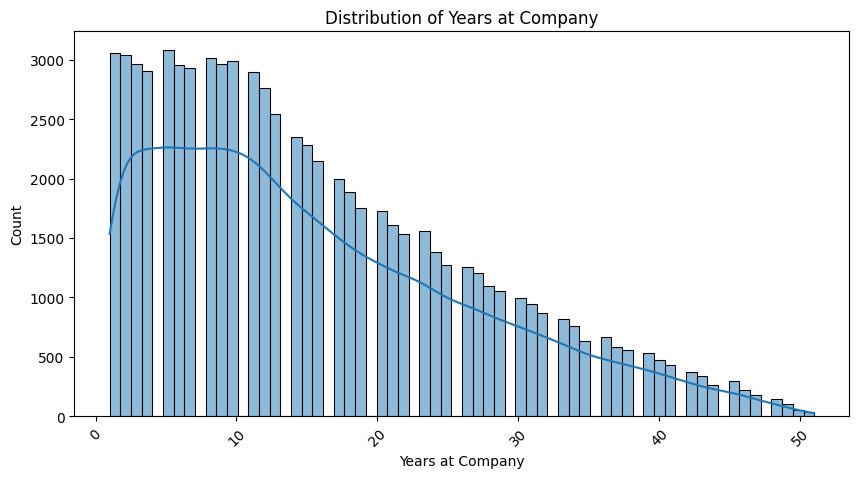

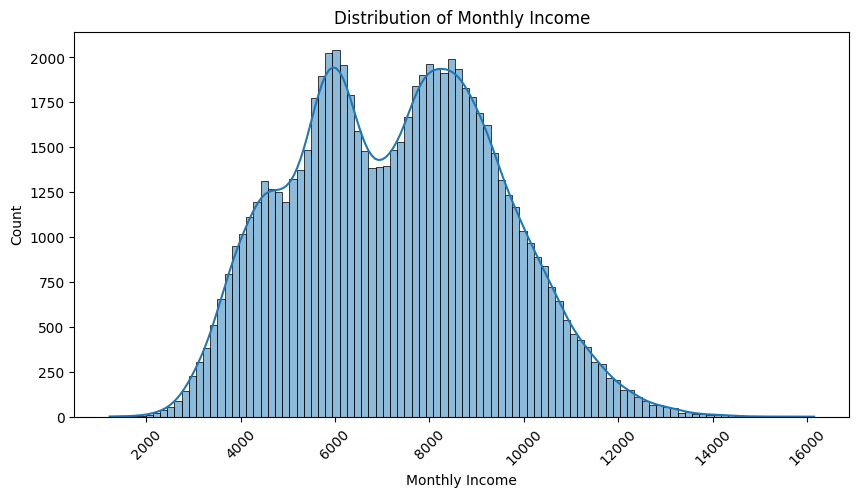

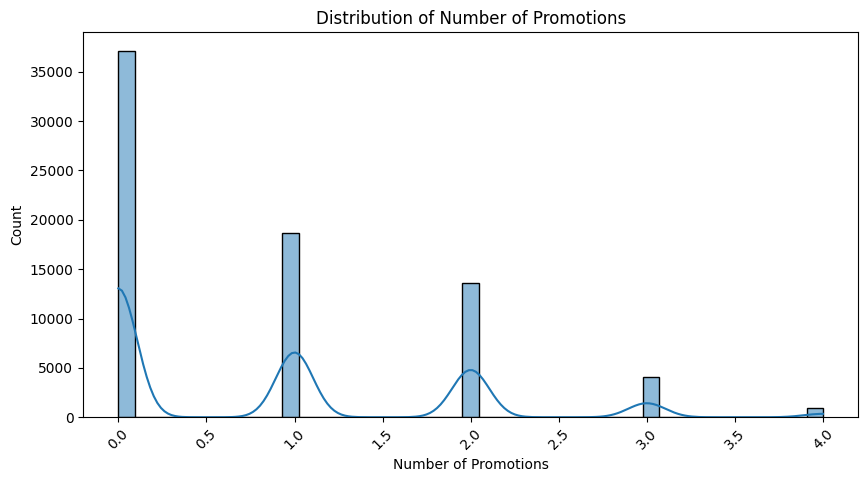

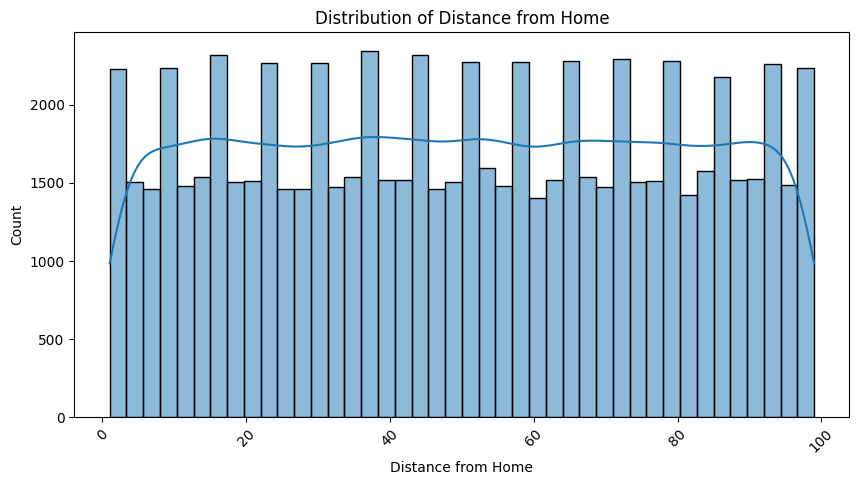

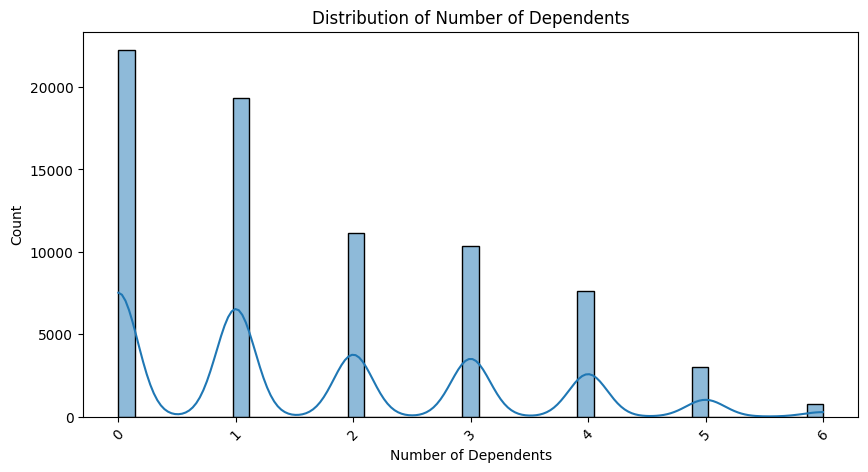

In [110]:
#Numerical Feature Distribution
c=['Age','Years at Company','Monthly Income','Number of Promotions','Distance from Home','Number of Dependents']
for i in c:
  plt.figure(figsize=(10,5))
  sns.histplot(x=employee[i],kde=True)
  plt.title(f'Distribution of {i}')
  plt.xticks(rotation=45)
  plt.show()

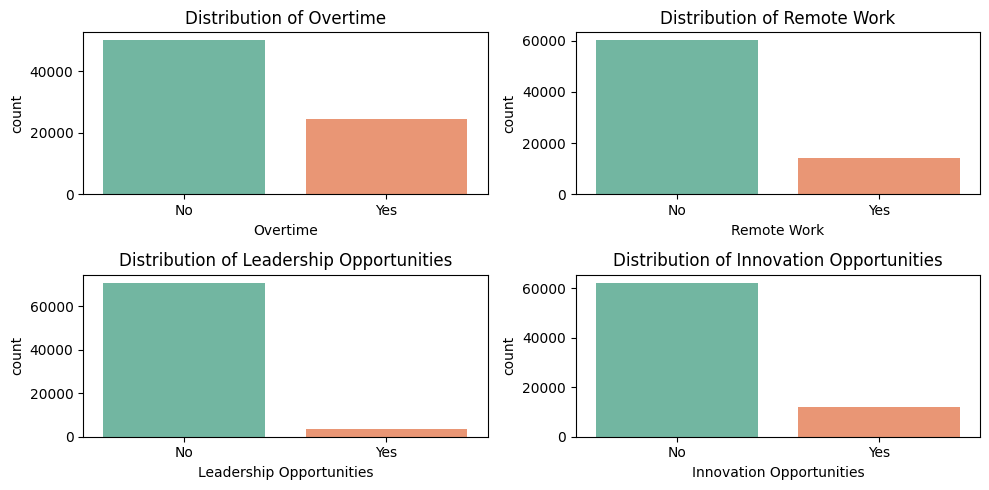

In [111]:
#Binary columns
binary_columns=['Overtime','Remote Work','Leadership Opportunities','Innovation Opportunities']
plt.figure(figsize=(10,5))
for i,col in enumerate(binary_columns,1):
  plt.subplot(2,2,i)
  sns.countplot(x=col,data=employee,hue=col,palette='Set2',legend=False)
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('count')
plt.tight_layout()
plt.show()

Data Cleaning and Data Preprocessing

In [112]:
#checking missing value in dataset
employee.isnull().sum()

,0
Employee ID,0
Age,0
Gender,0
Years at Company,0
Job Role,0
Monthly Income,0
Work-Life Balance,4
Job Satisfaction,0
Performance Rating,4
Number of Promotions,5


In [113]:
employee.columns

Index(['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role',
       'Monthly Income', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level', 'Marital Status',
       'Number of Dependents', 'Job Level', 'Company Size', 'Company Tenure',
       'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities',
       'Company Reputation', 'Employee Recognition', 'Attrition'],
      dtype='object')

In [114]:
categorical=['Work-Life Balance','Performance Rating','Education Level','Marital Status','Job Level','Company Size','Remote Work','Employee Recognition']
numerical=['Number of Promotions','Number of Dependents']

In [115]:
#impute missing value for categorical with mode
for col in categorical:
  if col in employee.columns:
    mode_value=employee[col].mode()[0]
    employee[col].fillna(mode_value,inplace=True)

In [116]:
#impute missing value for numerical with median
for col in numerical:
  if col in employee.columns:
    median_value=employee[col].median()
    employee[col].fillna(median_value,inplace=True)

In [117]:
#Verify the change
employee.isnull().sum()

,0
Employee ID,0
Age,0
Gender,0
Years at Company,0
Job Role,0
Monthly Income,0
Work-Life Balance,0
Job Satisfaction,0
Performance Rating,0
Number of Promotions,0


In [118]:
employee.columns

Index(['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role',
       'Monthly Income', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level', 'Marital Status',
       'Number of Dependents', 'Job Level', 'Company Size', 'Company Tenure',
       'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities',
       'Company Reputation', 'Employee Recognition', 'Attrition'],
      dtype='object')

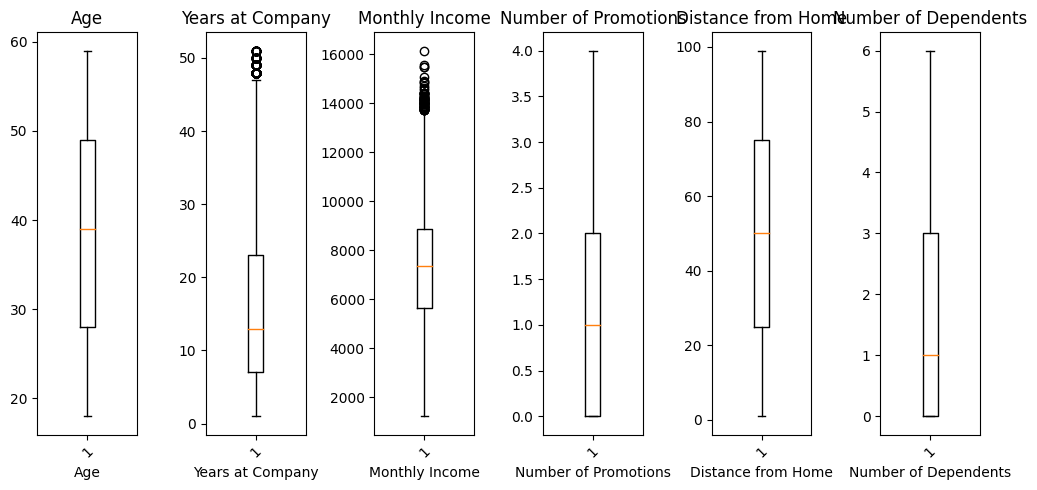

In [119]:
#Boxplot for outliers
columns=['Age','Years at Company','Monthly Income','Number of Promotions','Distance from Home','Number of Dependents']
plt.figure(figsize=(10,5))
for i,col in enumerate(columns):
  plt.subplot(1,len(columns),i+1)
  plt.boxplot(employee[col])
  plt.title(col)
  plt.xlabel(col)
  plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [120]:
#Not handling outliers.keeping it as such

In [121]:
#Dropping unnecessary columns which not give any information
column_to_drop=['Employee ID']
employee.drop(column_to_drop,axis=1,inplace=True)

In [122]:
#Encoding

In [123]:
employee.columns

Index(['Age', 'Gender', 'Years at Company', 'Job Role', 'Monthly Income',
       'Work-Life Balance', 'Job Satisfaction', 'Performance Rating',
       'Number of Promotions', 'Overtime', 'Distance from Home',
       'Education Level', 'Marital Status', 'Number of Dependents',
       'Job Level', 'Company Size', 'Company Tenure', 'Remote Work',
       'Leadership Opportunities', 'Innovation Opportunities',
       'Company Reputation', 'Employee Recognition', 'Attrition'],
      dtype='object')

In [124]:
employee['Attrition'].value_counts()

,count
Attrition,
Stayed,39128
Left,35370


In [125]:
#Encoding Binary Columns
employee['Gender']=employee['Gender'].map({'Female':0,'Male':1})
employee['Overtime']=employee['Overtime'].map({'No':0,'Yes':1})
employee['Remote Work']=employee['Remote Work'].map({'No':0,'Yes':1})
employee['Leadership Opportunities']=employee['Leadership Opportunities'].map({'No':0,'Yes':1})
employee['Innovation Opportunities']=employee['Innovation Opportunities'].map({'No':0,'Yes':1})
employee['Attrition']=employee['Attrition'].map({'Stayed':0,'Left':1})




In [126]:
#Frequency Encoding for Job Role
job_role_count=employee['Job Role'].value_counts()
employee['Job Role']=employee['Job Role'].map(job_role_count)

In [131]:
#Frequency Encoding for Education Level
education_level_count=employee['Education Level'].value_counts()
employee['Education Level']=employee['Education Level'].map(education_level_count)

In [127]:
employee['Employee Recognition'].value_counts()

,count
Employee Recognition,
Low,29621
Medium,22656
High,18550
Very High,3671


In [130]:
from sklearn.preprocessing import OrdinalEncoder
categories={
    'Work-Life Balance':['Poor','Fair','Good','Excellent'],
    'Job Satisfaction':['Low','Medium','High','Very High'],
    'Performance Rating':['Low','Below Average','Average','High'],
    'Company Reputation':['Poor','Fair','Good','Excellent'],
    'Employee Recognition':['Low','Medium','High','Very High'],
    'Job Level':['Entry','Mid','Senior']
}
encoder=OrdinalEncoder(categories=[categories[col] for col in categories])
encoded_values=encoder.fit_transform(employee[['Work-Life Balance','Job Satisfaction','Performance Rating','Company Reputation','Employee Recognition','Job Level']])
employee[['Work-Life Balance','Job Satisfaction','Performance Rating','Company Reputation','Employee Recognition','Job Level']]=encoded_values


In [132]:
#One hot encoding for marital status and company size
employee=pd.get_dummies(employee,columns=['Marital Status','Company Size'],drop_first=False)

In [133]:
#define feature set x and target variable
x=employee.drop('Attrition',axis=1)
y=employee['Attrition']

In [134]:
#Standardize the numerical column
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [135]:
#split the data into training and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [136]:
#Initialize the model
from xgboost import XGBClassifier
model=XGBClassifier(use_label_encoder=False,eval_metric='mlogloss')

In [137]:
#define the hyperparameter grid for RandomizedSearchcv
param_dist={
    'n_estimators':[100,200],
    'learning_rate':[0.01,0.1],
    'max_depth':[3,5],
    'min_child_weight':[1,3],
    'gamma':[0,0.1],
    'subsample':[0.8,1.0],
    'colsample_bytree':[0.8,1]
}

In [138]:
#Initialize RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
random_search=RandomizedSearchCV(model,param_dist,n_iter=10,cv=3,n_jobs=-1,verbose=2,random_state=42)

In [139]:
#fit the model
random_search.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='mlogloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learnin...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.8, 1],
                                        'gamma': [0, 0.1],
                                        'learning_rate': [0.01, 0.1],
                                        'max_depth': [3, 5],
                                        'min_child_weight': [1, 3],
                                        'n_estimators': [100, 200],
                                        'subsample': [0.8, 1.0]},
                   random_state=42, verbose=2)

In [140]:
#get best parameter from the tuning process
best_params=random_search.best_params_
print('Best Parameters:',best_params)

Best Parameters: {'subsample': 1.0, 'n_estimators': 200, 'min_child_weight': 3, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.8}


In [141]:
#Train the model with best parameter
best_model=random_search.best_estimator_


In [142]:
#Make prediction on test set
y_pred=best_model.predict(x_test)

In [144]:
#Evaluate the model
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy:',accuracy)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.7638926174496644
[[6063 1741]
 [1777 5319]]
              precision    recall  f1-score   support

           0       0.77      0.78      0.78      7804
           1       0.75      0.75      0.75      7096

    accuracy                           0.76     14900
   macro avg       0.76      0.76      0.76     14900
weighted avg       0.76      0.76      0.76     14900

